In [2]:
import pandas as pd
df = pd.read_csv('../amazon_movie_reviews.csv')

/tmp/ipykernel_728/2046565978.py:2: DtypeWarning: Columns (18,25) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../amazon_movie_reviews.csv')


In [3]:
df.head(), df.describe(), df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 26 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   Unnamed: 0         1000000 non-null  int64  
 1   rating             1000000 non-null  float64
 2   review_title       999873 non-null   object 
 3   text               999851 non-null   object 
 4   images_x           1000000 non-null  object 
 5   asin               1000000 non-null  object 
 6   parent_asin        1000000 non-null  object 
 7   user_id            1000000 non-null  object 
 8   timestamp          1000000 non-null  int64  
 9   helpful_vote       1000000 non-null  int64  
 10  verified_purchase  1000000 non-null  bool   
 11  main_category      990649 non-null   object 
 12  movie_title        457708 non-null   object 
 13  subtitle           20116 non-null    object 
 14  average_rating     999990 non-null   float64
 15  rating_number      999990 non-nul

(   Unnamed: 0  rating                                       review_title  \
 0           0     5.0                                         Five Stars   
 1           1     5.0                                         Five Stars   
 2           2     3.0                       Some decent moments...but...   
 3           3     4.0  Decent Depiction of Lower-Functioning Autism, ...   
 4           4     5.0                                    What Love Is...   
 
                                                 text images_x        asin  \
 0           Amazon, please buy the show! I'm hooked!       []  B013488XFS   
 1                         My Kiddos LOVE this show!!       []  B00CB6VTDS   
 2  Annabella Sciorra did her character justice wi...       []  B096Z8Z3R6   
 3  ...there should be more of a range of characte...       []  B09M14D9FZ   
 4  ...isn't always how you expect it to be, but w...       []  B001H1SVZC   
 
   parent_asin                       user_id      timestamp  helpf

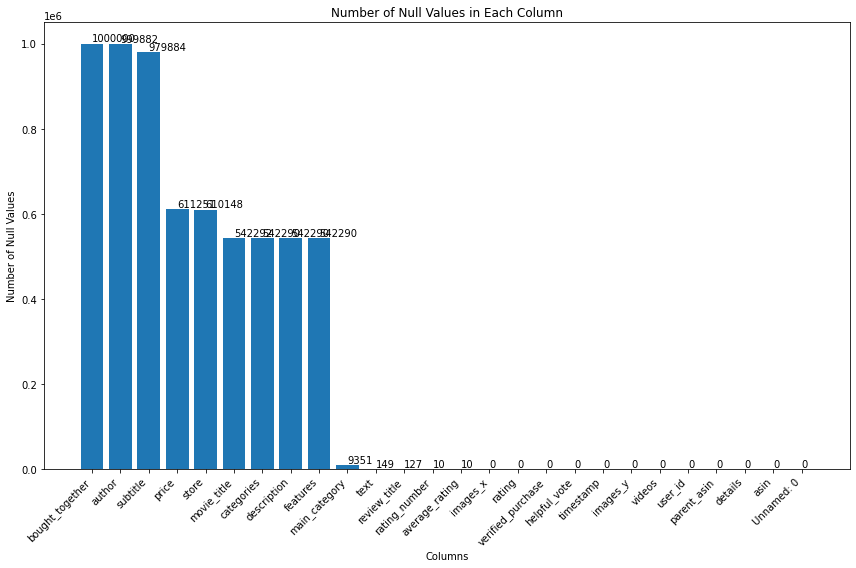

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

null_counts = df.isnull().sum()
null_counts = null_counts.sort_values(ascending=False)

plt.figure(figsize=(12, 8))
bars = plt.bar(null_counts.index, null_counts.values)

plt.title('Number of Null Values in Each Column')
plt.xlabel('Columns')
plt.ylabel('Number of Null Values')
plt.xticks(rotation=45, ha='right')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), va='bottom')  # va: vertical alignment

plt.tight_layout()
plt.show()

We can see that bought_together, author, subtitle are heavily not used in the original db

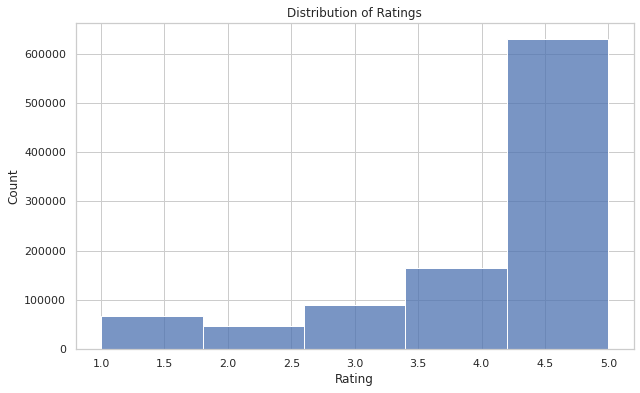

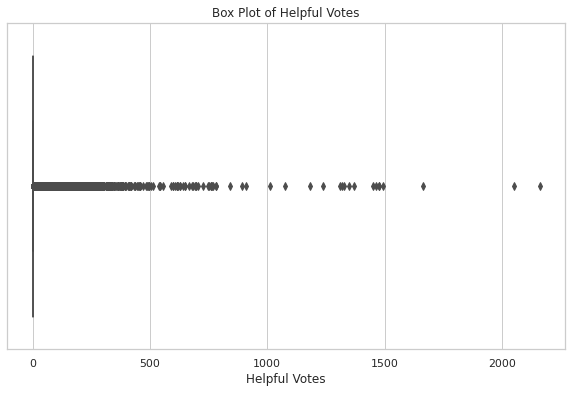

In [5]:
sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.histplot(df['rating'], bins=5, kde=False)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x=df['helpful_vote'])
plt.title('Box Plot of Helpful Votes')
plt.xlabel('Helpful Votes')
plt.show()

As we can see above the data heavily favors ratings above 3.5

ValueError: Multi-dimensional indexing (e.g. `obj[:, None]`) is no longer supported. Convert to a numpy array before indexing instead.

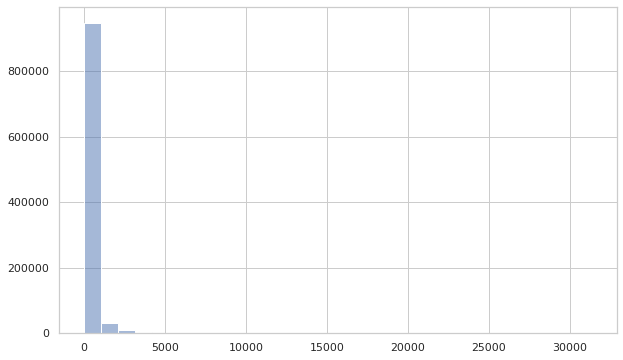

In [6]:
import numpy as np

df['text'] = df['text'].astype(str)

df['review_length'] = df['text'].apply(len)
length = np.array(df['review_length'])

plt.figure(figsize=(10, 6))
sns.histplot(length, bins=30, kde=True)
plt.title('Distribution of Review Lengths')
plt.xlabel('Review Length')
plt.ylabel('Count')
plt.show()

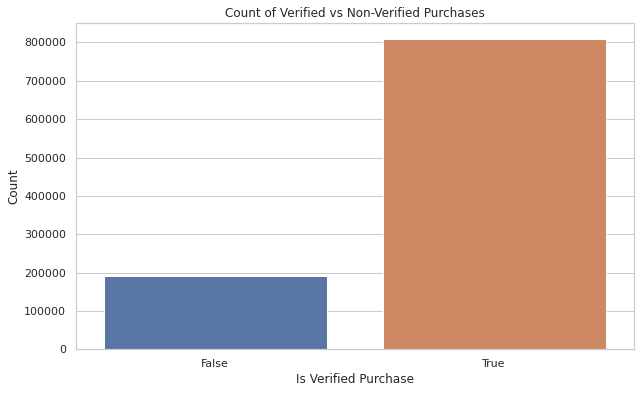

In [9]:
plt.figure(figsize=(10, 6))
sns.countplot(x=df['verified_purchase'])
plt.title('Count of Verified vs Non-Verified Purchases')
plt.xlabel('Is Verified Purchase')
plt.ylabel('Count')
plt.show()

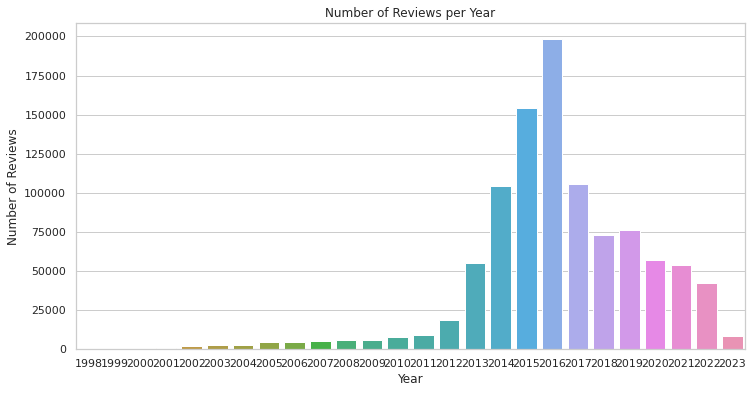

In [10]:
df['date'] = pd.to_datetime(df['timestamp'], unit='ms')

df['year'] = df['date'].dt.year

plt.figure(figsize=(12, 6))
sns.countplot(x='year', data=df)
plt.title('Number of Reviews per Year')
plt.xlabel('Year')
plt.ylabel('Number of Reviews')
plt.show()

Reviews are heavily in the year 2016 but seem to stretch back much earlier as well and all the way to 2023

In [7]:
from collections import Counter
import re

# Precompile the regular expressions to improve performance
pattern_punct = re.compile(r'[^\w\s]')
pattern_nums = re.compile(r'\d+')

# Function to clean and split text efficiently
def clean_text(text):
    # Using precompiled regex, replace non-word characters and digits
    text = pattern_punct.sub('', text)
    text = pattern_nums.sub('', text)
    # Convert to lowercase and split into words
    return text.lower().split()

# Use a generator expression to reduce memory usage
words = (word for review in df['text'] for word in clean_text(review))

# Count the frequency of each word using Counter
word_counts = Counter(words)

# Get the most common words
most_common_words = word_counts.most_common(50)
print(most_common_words)

[('the', 2437241), ('and', 1351111), ('a', 1229999), ('to', 1038526), ('of', 1008593), ('i', 893383), ('it', 791741), ('is', 788622), ('this', 723262), ('in', 616781), ('movie', 474376), ('was', 451166), ('that', 443868), ('for', 409214), ('but', 364513), ('with', 346464), ('as', 330996), ('you', 284411), ('on', 279752), ('not', 277252), ('great', 250069), ('br', 244718), ('are', 237053), ('good', 235000), ('have', 232371), ('one', 206280), ('my', 198063), ('so', 196929), ('all', 193268), ('be', 188714), ('its', 180749), ('like', 172108), ('they', 170131), ('love', 162062), ('very', 160522), ('his', 159197), ('he', 152290), ('at', 152112), ('an', 150564), ('just', 150237), ('film', 148623), ('from', 141980), ('if', 140488), ('story', 138528), ('more', 130529), ('by', 126863), ('about', 125951), ('who', 125204), ('watch', 123157), ('what', 122430)]


Unsurprisingly the most common words are linking words, however movie is interesting that that popped in so early

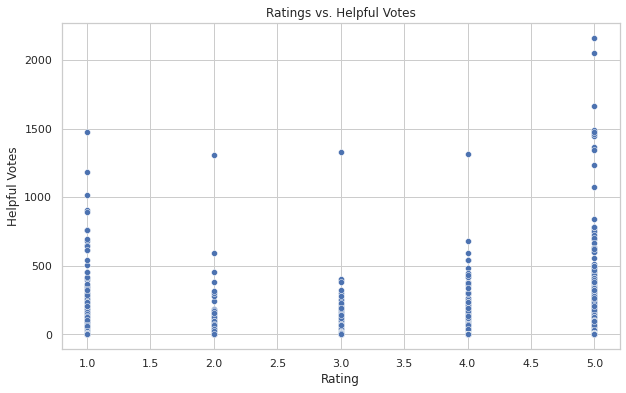

In [10]:
# Scatter plot of Ratings vs. Helpful Votes
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['rating'], y=df['helpful_vote'])
plt.title('Ratings vs. Helpful Votes')
plt.xlabel('Rating')
plt.ylabel('Helpful Votes')
plt.show()

It does seem that there aren't really any half star votes, only full stars

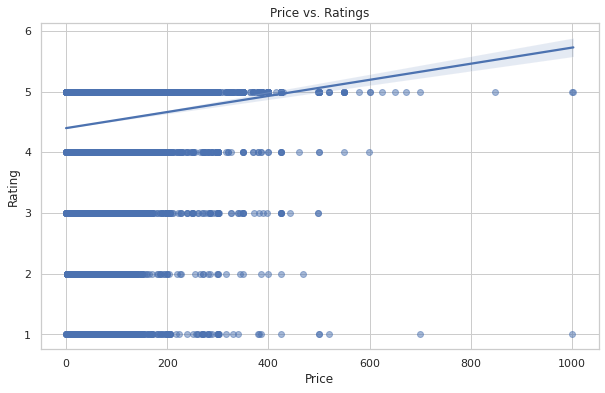

In [12]:
df['price'] = pd.to_numeric(df['price'], errors='coerce') 

plt.figure(figsize=(10, 6))
sns.regplot(x=df['price'], y=df['rating'], scatter_kws={'alpha':0.5})
plt.title('Price vs. Ratings')
plt.xlabel('Price')
plt.ylabel('Rating')
plt.show()